<a href="https://colab.research.google.com/github/alswnsdlf/sec1_project/blob/main/ai06_sec1_project_%EB%AF%BC%EC%A4%80%EC%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
## 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
## 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다. = 출고량에 대해서 그래프 그리기

In [ ]:
### Name : 게임의 이름입니다.
### Platform : 게임이 지원되는 플랫폼의 이름입니다.
### Year : 게임이 출시된 연도입니다.
### Genre : 게임의 장르입니다.
### Publisher : 게임을 제작한 회사입니다.
### NA_Sales : 북미지역에서의 출고량입니다.
### EU_Sales : 유럽지역에서의 출고량입니다.
### JP_Sales : 일본지역에서의 출고량입니다.
### Other_Sales : 기타지역에서의 출고량입니다.

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import seaborn as sns

In [2]:
from google.colab import files
myfile = files.upload()

Saving vvgames.xlsx to vvgames.xlsx


In [3]:
df = pd.read_excel("vvgames.xlsx")
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) / 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', ''))
        return 1000000.0
df['NA_Sales'] = df['NA_Sales'].apply(value_to_float)
df['EU_Sales'] = df['EU_Sales'].apply(value_to_float)
df['JP_Sales'] = df['JP_Sales'].apply(value_to_float)
df['Other_Sales'] = df['Other_Sales'].apply(value_to_float)

In [5]:
df = df.dropna()

In [6]:
def year(string):
    if string <= 20:
        string += 2000
        return string
    elif string >=20 and string <= 100:
        string += 1900
        return string
    else:
        return string
df['Year'] = df['Year'].apply(year)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [7]:
columns = df['Genre'].dropna().unique()
columns = df['Name'].dropna().unique()

In [8]:
df1 = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16593,Platform,0.15,0.04,0.00,0.01
16594,Action,0.01,0.00,0.00,0.00
16595,Sports,0.44,0.19,0.03,0.13
16596,Action,0.05,0.05,0.25,0.03


In [ ]:
## 지역에 따라서 선호하는 게임 장르 차이

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [11]:
dfn = df1['NA_Sales']
dfe = df1['EU_Sales']
dfj = df1['JP_Sales']
dfo = df1['Other_Sales']

In [12]:
stats.ttest_ind(dfn, dfe)

Ttest_indResult(statistic=15.529525797935786, pvalue=3.4317895727998404e-54)

In [13]:
stats.ttest_ind(dfn, dfj)

Ttest_indResult(statistic=27.110943285213644, pvalue=4.4507542167131846e-160)

In [14]:
stats.ttest_ind(dfn, dfo)

Ttest_indResult(statistic=32.75961180597882, pvalue=1.3190254580891499e-231)

In [15]:
stats.ttest_ind(dfe, dfj)

Ttest_indResult(statistic=14.800173863041575, pvalue=2.117441732706286e-49)

In [16]:
stats.ttest_ind(dfe, dfo)

Ttest_indResult(statistic=23.287148656934725, pvalue=5.661327468928941e-119)

In [17]:
stats.ttest_ind(dfj, dfo)

Ttest_indResult(statistic=10.552435787148172, pvalue=5.453546084153095e-26)

In [ ]:
## 가정 : 지역별로 선호하는 게임의 장르는 다르다.
## 이를 확인하기 위해, 지역별로 선호하는 게임의 장르는 같다는 가설을 확인해봐야한다.
##  모든 p-value(검정 통계량) 의 값이 0.05 보다 작다.
##  p-value 가 0.05 보다 작으므로 지역별로 선호하는 게임의 장르는 같지 않을 수도
## 있다, 즉, 지역별로 게임의 장르에 대한 선호도가 다를 수도 있다는 결론이 도출된다.

In [65]:
df1.groupby('Genre').sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.75,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86


In [ ]:
## 각 지역별 장르 총 출고량 현황

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

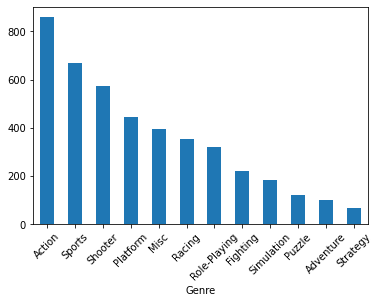

In [66]:
df1.groupby("Genre").NA_Sales.sum().sort_values(ascending=False)[:12].plot.bar()
plt.xticks(rotation = 45 )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

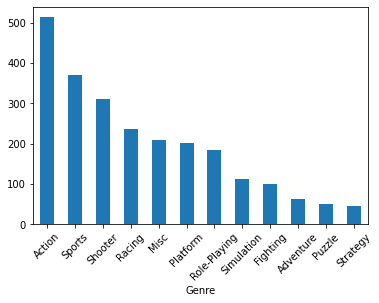

In [67]:
df1.groupby("Genre").EU_Sales.sum().sort_values(ascending=False)[:12].plot.bar()
plt.xticks(rotation = 45 )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

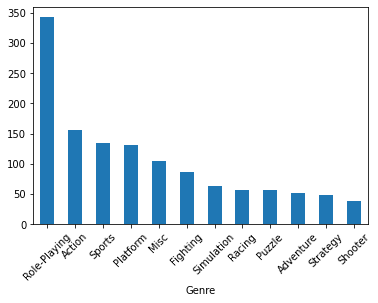

In [68]:
df1.groupby("Genre").JP_Sales.sum().sort_values(ascending=False)[:12].plot.bar()
plt.xticks(rotation = 45 )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

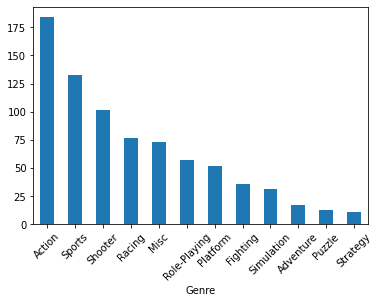

In [69]:
df1.groupby("Genre").Other_Sales.sum().sort_values(ascending=False)[:12].plot.bar()
plt.xticks(rotation = 45 )

In [ ]:
## 카이제곱검정
## 관찰된 빈도가 기대되는 빈도와 의미있게 다른지의 여부 검정

In [ ]:
## 연도별 게임의 트랜드 구하기
## 대립가설 : 연도별로 트렌드는 있을 것이다.
## 귀무가설 : 연도별로 트렌드는 없을 것이다.

In [23]:
dfp = pd.crosstab(df['Genre'], df['Year'])
dfp

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,1,25,18,7,1,2,6,2,2,2,3,5,1,6,4,8,20,31,44,39,43,66,125,144,125,192,184,210,219,271,226,239,263,148,186,253,118,1,0
Adventure,0,0,0,1,0,0,0,1,0,0,0,2,4,1,4,13,17,14,23,19,16,20,41,12,38,42,71,83,166,141,152,107,57,60,75,53,33,0,0
Fighting,1,0,0,0,0,1,0,2,0,0,0,1,7,11,22,29,30,28,41,24,29,18,54,44,39,43,55,50,57,53,40,49,29,20,23,21,14,0,0
Misc,4,0,1,1,1,0,0,0,0,1,0,1,2,3,6,22,23,12,21,25,20,26,45,53,67,110,109,150,210,207,200,183,38,42,41,39,18,0,0
Platform,0,3,5,5,1,4,6,2,4,3,3,6,6,11,11,13,14,18,25,18,24,43,77,87,66,82,54,42,62,28,31,37,11,37,10,14,10,0,0
Puzzle,0,2,3,1,3,4,0,0,1,5,2,4,5,3,3,12,9,14,13,6,12,15,20,7,25,32,42,65,64,79,45,43,11,3,7,6,0,0,0
Racing,0,1,2,0,3,0,1,0,1,0,2,1,2,2,8,12,21,36,48,49,43,71,103,109,70,77,75,84,82,83,57,64,30,16,27,19,20,0,0
Role-Playing,0,0,0,0,0,0,1,3,3,2,2,5,5,9,17,24,28,23,26,32,29,41,54,48,60,71,108,103,112,103,103,95,78,70,90,78,40,2,0
Shooter,2,10,5,1,3,1,4,2,1,1,0,3,3,2,11,29,23,27,23,16,20,36,78,73,88,96,69,84,83,91,81,94,48,59,47,34,32,0,0


In [24]:
obss = pd.crosstab(df['Genre'], df['Year'])
print(chi2_contingency(obss, correction = True))

(2762.563121673782, 0.0, 418, array([[1.59615740e+00, 9.17790504e+00, 7.18270829e+00, 3.39183447e+00,
        2.79327545e+00, 2.79327545e+00, 4.18991317e+00, 3.19231480e+00,
        2.99279512e+00, 3.39183447e+00, 3.19231480e+00, 8.18030667e+00,
        8.57934602e+00, 1.19711805e+01, 2.41418807e+01, 4.36948088e+01,
        5.22741548e+01, 5.76611860e+01, 7.52189174e+01, 6.70386108e+01,
        6.94328469e+01, 9.57694439e+01, 1.64803251e+02, 1.54428228e+02,
        1.47644559e+02, 1.86351376e+02, 2.00517273e+02, 2.38226492e+02,
        2.83916497e+02, 2.84914096e+02, 2.49798633e+02, 2.26055792e+02,
        1.30086828e+02, 1.08738223e+02, 1.15721411e+02, 1.21906521e+02,
        6.82357288e+01, 5.98559025e-01, 1.99519675e-01],
       [6.23683724e-01, 3.58618142e+00, 2.80657676e+00, 1.32532791e+00,
        1.09144652e+00, 1.09144652e+00, 1.63716978e+00, 1.24736745e+00,
        1.16940698e+00, 1.32532791e+00, 1.24736745e+00, 3.19637909e+00,
        3.35230002e+00, 4.67762793e+00, 9.4332163

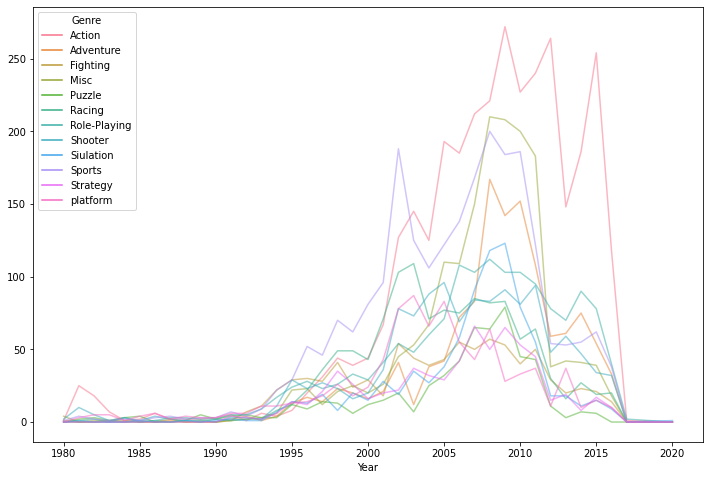

In [25]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.lineplot(data = obss.T,  dashes = False, alpha = 0.5);

In [ ]:
## 카이제곱 검정의 p-value 가 0 에 수렴한다.
## 따라서, 귀무가설을 기각 할 수 있으므로
## 대립 가설인 "연도별로 트렌드는 있을 것이다." 를 채택한다.

In [ ]:
## global sales

In [27]:
df['global']=df['NA_Sales']+df['JP_Sales']+df['EU_Sales']+df['Other_Sales']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
## 모든 sales 들의 합은 세계적 출고량이다.

In [28]:
df[['global']]

,global
0,0.04
1,0.18
2,0.02
3,0.04
4,0.25
...,...
16593,0.20
16594,0.01
16595,0.79
16596,0.38


In [ ]:
## 이름과 세계적 출고량에 대한 표를 만든다.

In [29]:
df2 = df[['Name','global']]
df2

,Name,global
0,Candace Kane's Candy Factory,0.04
1,The Munchables,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,0.02
3,Deal or No Deal: Special Edition,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,0.25
...,...,...
16593,Ice Age 2: The Meltdown,0.20
16594,Rainbow Islands: Revolution,0.01
16595,NBA 2K16,0.79
16596,Toukiden: The Age of Demons,0.38


In [ ]:
## 세계적으로 출고량이 많았던 TOP 10 게임들을 뽑는다.

In [30]:
df2[['global', 'Name']].sort_values('global', ascending=False).nlargest(10, 'global')

,global,Name
2908,82.74,Wii Sports
4199,40.24,Super Mario Bros.
12579,35.83,Mario Kart Wii
3352,33.00,Wii Sports Resort
7829,31.38,Pokemon Red/Pokemon Blue
1203,30.26,Tetris
6937,30.01,New Super Mario Bros.
3014,29.01,Wii Play
16531,28.61,New Super Mario Bros. Wii
10488,28.31,Duck Hunt


In [ ]:
## 백분위로 계산

In [31]:
Wii_Sports = 82.74/369.39
Super_Mario_Bros = 40.24/369.39
Mario_Kart_Wii = 35.83/369.39
Wii_Sports_Resort = 33/369.39
Pokemon_Red_Pokemon_Blue = 31.38/369.39
Tetris = 30.26/369.39
New_Super_Mario_Bros = 30.01/369.39
Wii_Play = 29.01/369.39
New_Super_Mario_Bros_Wii = 28.61/369.39
Duck_Hunt = 28.31/369.39

In [32]:
82.74 + 40.24 + 35.83 + 33 + 31.38 + 30.26 + 30.01 + 29.01 + 28.61 + 28.31

369.39

In [33]:
round(82.74/369.39 * 100, 1)

22.4

In [34]:
round(40.24/369.39 * 100, 1)

10.9

In [35]:
round(35.83/369.39 * 100, 1)

9.7

In [36]:
round(33/369.39 * 100, 1)

8.9

In [37]:
round(31.38/369.39 * 100, 1)

8.5

In [38]:
round(30.26/369.39 * 100, 1)

8.2

In [39]:
round(30.01/369.39 * 100, 1)

8.1

In [40]:
round(29.01/369.39 * 100, 1)

7.9

In [41]:
round(28.61/369.39 * 100, 1)

7.7

In [42]:
round(28.31/369.39* 100, 1)

7.7

In [ ]:
## 결과값을 pie 차트로 나타낸다.

In [43]:
ratio = [22.4, 10.9, 9.7, 8.9, 8.5, 8.2, 8.1, 7.9, 7.7, 7.7]
labels = ['Wii_Sports', 'Super_Mario_Bros', 'Mario_Kart_Wii', 'Wii_Sports_Resort',
          'Pokemon_Red_Pokemon_Blue', 'Tetris', 'New_Super_Mario_Bros', 'Wii_Play',
          'New_Super_Mario_Bros_Wii','Duck_Hunt']

Text(0.5, 1.0, 'global_sales')

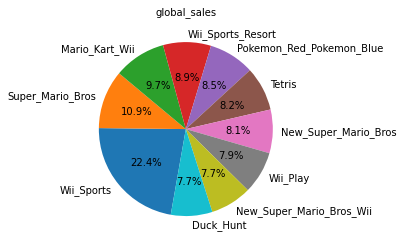

In [44]:
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('global_sales', fontsize=10)

In [ ]:
## Wii Sports 가 전 세계적으로 출고량이 가장 높았던 게임입니다.
## NA 는 Action, EU는 Action, JP는 Role-Playing, 그 외 지역들은 Action 장르의 게임들이 출고량 1위를 차지했습니다.
## 따라서, 매출량을 증가시키려면 세계적으로 인기있는 장르인 action 게임을 설계해야합니다.

In [45]:
df3 = df1.groupby('Genre').sum()
df3

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.75,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86


In [46]:
df3['global2']=df3['NA_Sales']+df3['JP_Sales']+df3['EU_Sales']+df3['Other_Sales']
df3[['global2']]

,global2
Genre,
Action,1712.98
Adventure,233.90
Fighting,443.54
Misc,779.70
Platform,827.99
Puzzle,240.73
Racing,722.55
Role-Playing,901.51
Shooter,1024.75


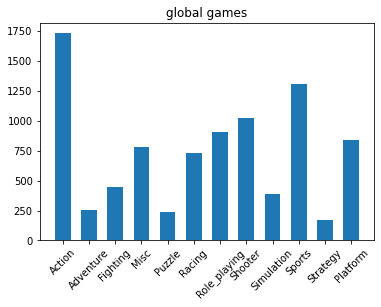

In [60]:
x = np.arange(12)
Genre = ['Action', 'Adventure', 'Fighting', 'Misc', 'Puzzle', 'Racing', 'Role_playing', 'Shooter', 'Simulation',
         'Sports', 'Strategy', 'Platform']
values = [1729.23, 250.42, 444.08, 779.81, 240.73, 726.49, 903.36, 1024.75, 389.30, 1308.8, 172.98, 837.40]

plt.bar(x, values, width=0.6, linewidth=5)
plt.xticks(x, Genre)
plt.title('global games')
plt.xticks(rotation = 45 )
plt.show()

In [ ]:
## 세계적으로 Actionn 게임의 출고량이 압도적으로 높다.
## 주어진 수치 데이터가 출고량 밖에 없다.
## 출고량을 고려했을 때, 다음 분기 게임 설계 시에 장르를 Action 으로 하는 것이 가장 효율적일 것이다.

In [ ]:
## 4개 지역별 TOP 5 게임 순위

In [ ]:
df[['NA_Sales', 'Name']].sort_values('NA_Sales', ascending=False).nlargest(5, 'NA_Sales')

,NA_Sales,Name
2908,41.49,Wii Sports
4199,29.08,Super Mario Bros.
10488,26.93,Duck Hunt
1203,23.20,Tetris
12579,15.85,Mario Kart Wii


In [ ]:
round(41.49 + 29.08 + 26.93 + 23.20 + 15.85, 3) ## 총합 -> 백분위 구하는 과정

136.55

In [ ]:
round(41.49 / 136.55 * 100, 3)

30.384

In [ ]:
round(29.08 / 136.55 * 100, 3)

21.296

In [ ]:
round(26.93 / 136.55 * 100, 3)

19.722

In [ ]:
round(23.20 / 136.55 * 100, 3)

16.99

In [ ]:
 round(15.85 / 136.55 * 100, 3)

11.607

In [ ]:
ratio1 = [30.384, 21.296, 19.722, 16.99, 11.607]
labels = ['Wii_Sports', 'Super_Mario_Bros', 'Duck Hunt', 'Tetris',
          'Mario Kart Wii']

Text(0.5, 1.0, 'NA_sales')

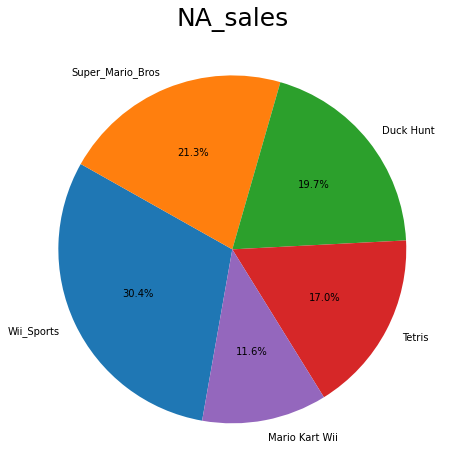

In [ ]:
plt.pie(ratio1, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('NA_sales' , fontsize=25)

In [ ]:
df[['EU_Sales', 'Name']].sort_values('EU_Sales', ascending=False).nlargest(5, 'EU_Sales')

,EU_Sales,Name
2908,29.02,Wii Sports
12579,12.88,Mario Kart Wii
3352,11.01,Wii Sports Resort
11137,11.00,Nintendogs
3483,9.27,Grand Theft Auto V


In [ ]:
round(29.02 + 12.88 + 11.01 + 11 + 9.27, 3) ## 총합

73.18

In [ ]:
round(29.02 / 73.18 *100, 3) ## 각 항목 백분위

39.656

In [ ]:
round(12.88 / 73.18 *100, 3)

17.6

In [ ]:
round(11.01 / 73.18 *100, 3)

15.045

In [ ]:
round(11.00 / 73.18 *100, 3)

15.031

In [ ]:
round(9.27 / 73.18 *100, 3)

12.667

In [ ]:
ratio2 = [39.656, 17.6, 15.045, 15.031, 12.667]
labels = ['Wii_Sports', 'Mario Kart Wii', 'Wii_Sports_Resort', 'Nintendogs', 'Grand_Theft_Auto_V']

Text(0.5, 1.0, 'EU_Sales')

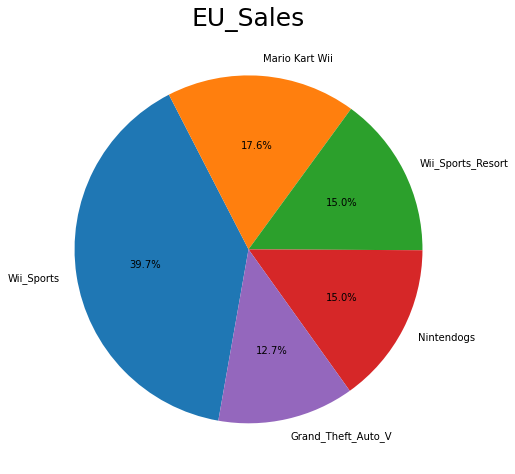

In [ ]:
plt.pie(ratio2, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('EU_Sales' , fontsize=25)

In [ ]:
df[['JP_Sales', 'Name']].sort_values('JP_Sales', ascending=False).nlargest(5, 'JP_Sales')

,JP_Sales,Name
7829,10.22,Pokemon Red/Pokemon Blue
9416,7.20,Pokemon Gold/Pokemon Silver
4199,6.81,Super Mario Bros.
6937,6.50,New Super Mario Bros.
10555,6.04,Pokemon Diamond/Pokemon Pearl


In [ ]:
round(10.22 + 7.20 + 6.81 + 6.50 + 6.04, 3) ## 총합

36.77

In [ ]:
round(10.22 / 36.77 * 100, 3) ## 각 항목 백분위

27.794

In [ ]:
round(7.20 / 36.77 * 100, 3)

19.581

In [ ]:
round(6.81	 / 36.77 * 100, 3)

18.521

In [ ]:
round(6.50	 / 36.77 * 100, 3)

17.677

In [ ]:
round(6.04	 / 36.77 * 100, 3)

16.426

Text(0.5, 1.0, 'JP_Sales')

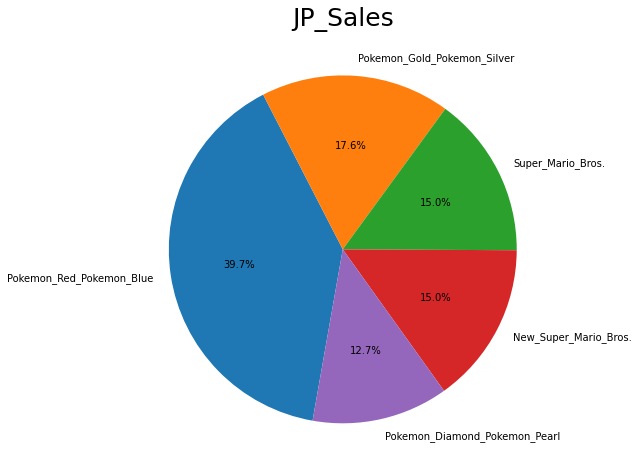

In [ ]:
ratio3 = [39.656, 17.6, 15.045, 15.031, 12.667]
labels = ['Pokemon_Red_Pokemon_Blue', 'Pokemon_Gold_Pokemon_Silver', 'Super_Mario_Bros.', 'New_Super_Mario_Bros.', 'Pokemon_Diamond_Pokemon_Pearl']
plt.pie(ratio3, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('JP_Sales' , fontsize=25)

In [ ]:
df[['Other_Sales', 'Name']].sort_values('Other_Sales', ascending=False).nlargest(5, 'Other_Sales')

,Other_Sales,Name
14669,10.57,Grand Theft Auto: San Andreas
2908,8.46,Wii Sports
14665,7.53,Gran Turismo 4
3483,4.14,Grand Theft Auto V
12579,3.31,Mario Kart Wii


In [ ]:
round(10.57 + 8.46 + 7.53 + 4.14 + 3.31, 3)

34.01

In [ ]:
round(10.57 / 34.01 * 100, 3)

31.079

In [ ]:
round(8.46	 / 34.01 * 100, 3)

24.875

In [ ]:
round(7.53	 / 34.01 * 100, 3)

22.141

In [ ]:
round(4.14	 / 34.01 * 100, 3)

12.173

In [ ]:
round(3.31	 / 34.01 * 100, 3)

9.732

Text(0.5, 1.0, 'Other_Sales')

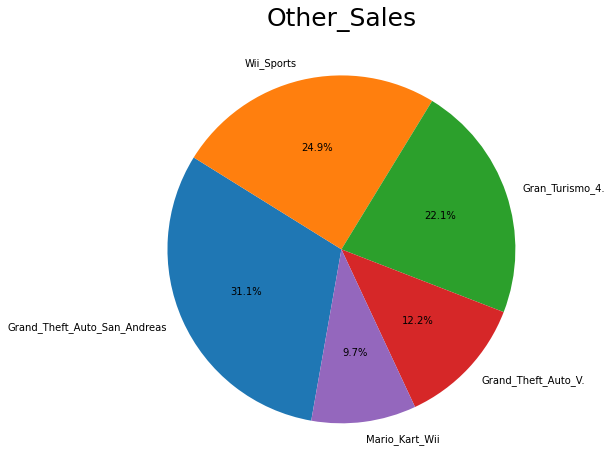

In [ ]:
ratio4 = [31.079, 24.875, 22.141, 12.173, 9.732]
labels = ['Grand_Theft_Auto_San_Andreas', 'Wii_Sports', 'Gran_Turismo_4.', 'Grand_Theft_Auto_V.', 'Mario_Kart_Wii']
plt.pie(ratio4, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('Other_Sales' , fontsize=25)